### Predicting Survival in the Titanic Data Set We will be using a decision tree to make predictions about the                  Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to         predict whether a passenger survived or not. You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch     (Parents/children aboard), and Fare to predict whether a passenger survived.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
import scikitplot as splt
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,accuracy_score

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv",sep=",")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing

In [3]:
# we will be removing all the features which will have no importance for predicting output
#passengerID,Name,Ticket
df=df.drop(["PassengerId","Name","Ticket"],axis=1)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [5]:
#checking is there any null value present in dataset or not
df.isnull().values.any()  #if return true means null value is present else no null value present in dataset

True

In [6]:
df.shape

(891, 9)

In [7]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
#checking the percentage of null value present in features having null value
percentage_null_Cabin=(df["Cabin"].isnull().sum()/len(df["Cabin"]))*100
percentage_null_Cabin

77.10437710437711

77.10 this feature contains a lot of missing value hence won't onsider it for further operation

In [10]:
df=df.drop(["Cabin","Embarked"],axis=1)

In [11]:
percentage_null_Age=(df["Age"].isnull().sum()/len(df["Age"]))*100
percentage_null_Age

19.865319865319865

As missing value is nut much hence we will fill this missing values by their median

In [12]:
#filling missing value o Age by median
df["Age"]=df["Age"].replace(np.nan,df["Age"].median())

In [13]:
df=df.dropna()  #removing 2 nan value of Embarked from row

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [15]:
df.shape

(891, 7)

## Data Visualization

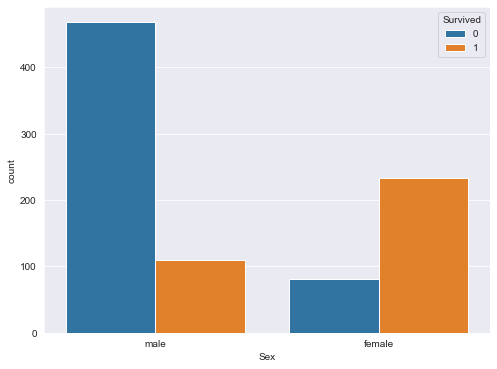

In [16]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("Sex",data=df,hue="Survived",orient="h")
plt.show()

Here We can see survival rate of female was much much more grater than male

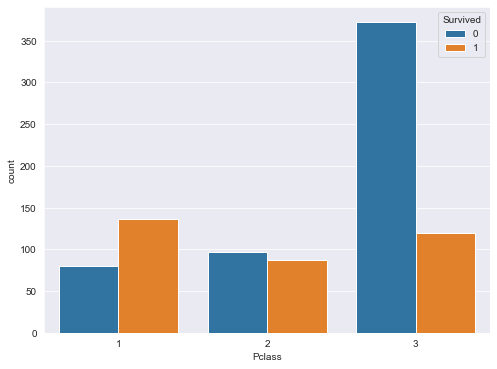

In [17]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("Pclass",hue="Survived",data=df)
plt.show()

people of passenger clas 1 had been survived more as compared to class2 and class 3  highest number of death had been seen in pclass 3

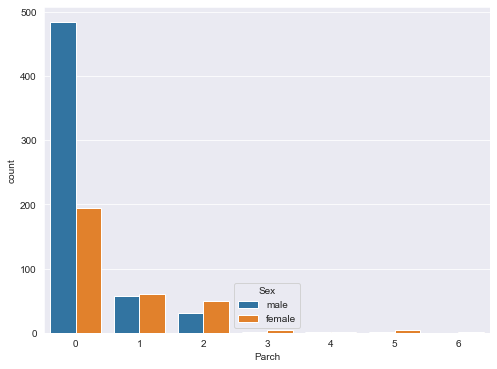

In [18]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("Parch",data=df,hue="Sex",orient="h")
plt.show()

## Feature Engineering

In [19]:
#our main task is to convert catgorical variables into numerical variable for futher ml odelling and calculation
df["Sex"]=df["Sex"].map({"male":0,"female":1})
df["Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


## Pre modeling step

In [21]:
X=df.loc[:,df.columns!="Survived"]
Y=df.loc[:,"Survived"]
print(X.shape)
print(Y.shape)

(891, 6)
(891,)


In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [23]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
30,1,0,40.0,0,0,27.7208
10,3,1,4.0,1,1,16.7000
873,3,0,47.0,0,0,9.0000
182,3,0,9.0,4,2,31.3875
876,3,0,20.0,0,0,9.8458
...,...,...,...,...,...,...
534,3,1,30.0,0,0,8.6625
584,3,0,28.0,0,0,8.7125
493,1,0,71.0,0,0,49.5042
527,1,0,28.0,0,0,221.7792


In [24]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(712, 6)
(712,)
(179, 6)
(179,)


In [25]:
#setting parameter for hyperparameter tuning
param_grid={"criterion":["gini","entropy"],
            "splitter":["best","random"],
           "max_depth":[2,3,4,5],
           "min_samples_leaf":[1,2,3,4,5],
           }

## Modeling and evaluation

In [26]:
#Model performance before optimization

In [27]:
clf_=DecisionTreeClassifier()
clf_.fit(X_train,Y_train)


DecisionTreeClassifier()

In [28]:
predict=clf_.predict(X_test)

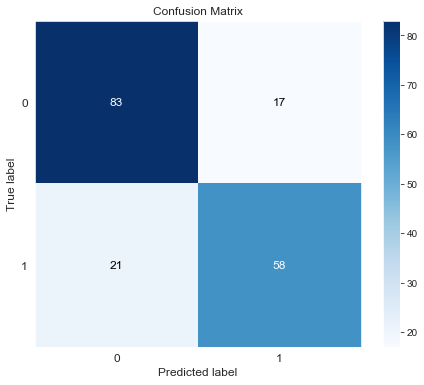

In [29]:
#evaluation of model
from sklearn import metrics
ax=splt.metrics.plot_confusion_matrix(Y_test,predict,figsize=(8,6),text_fontsize="large",title_fontsize="large")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [30]:
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.77      0.73      0.75        79

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [31]:
accuracy_score(Y_test,predict)

0.7877094972067039

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


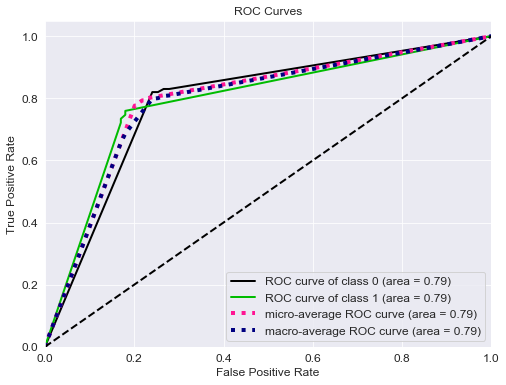

In [32]:
predicted_probab=clf_.predict_proba(X_test)
splt.metrics.plot_roc_curve(Y_test,predicted_probab,figsize=(8,6),text_fontsize="large")
plt.show()


In [33]:
#by doing hyperparameter tuning
clf=DecisionTreeClassifier()
grid_cv=GridSearchCV(estimator=clf,param_grid=param_grid,cv=5,n_jobs=-1)
grid_cv.fit(X_train,Y_train)
grid_cv.best_params_


{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [34]:
grid_cv.best_score_

0.8272530286614794

In [35]:
clf=DecisionTreeClassifier(criterion="gini",max_depth=4,min_samples_leaf=1,splitter="best")
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4)

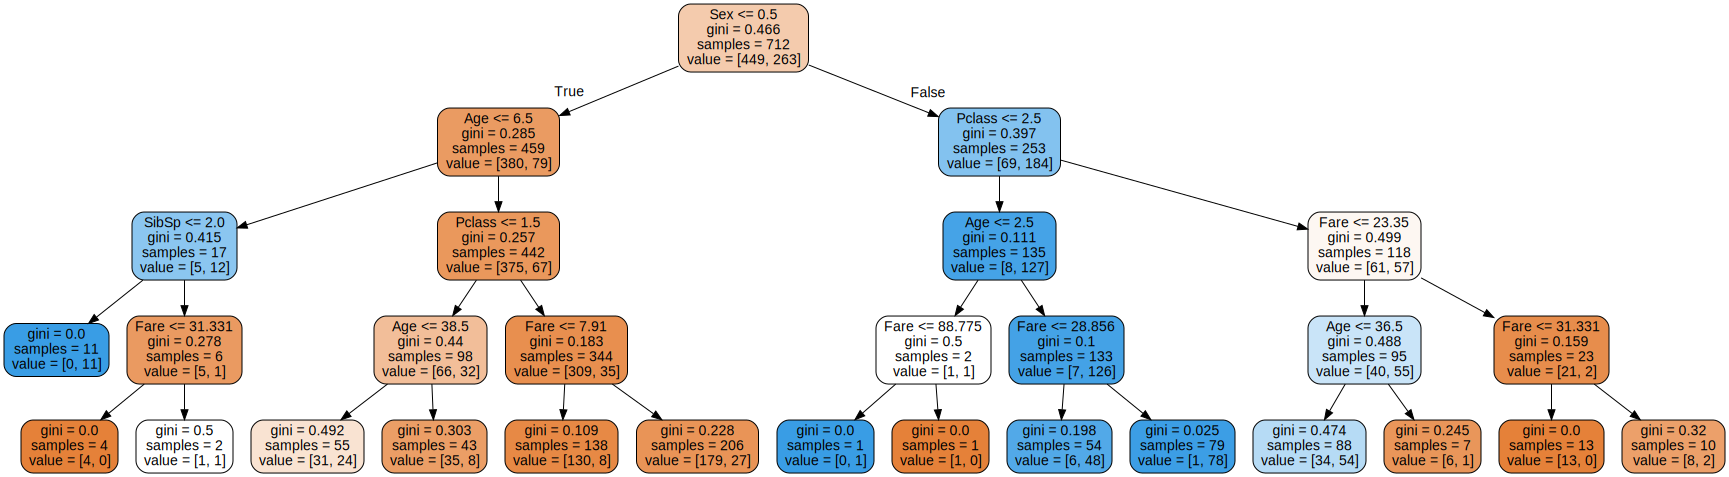

<Figure size 864x576 with 0 Axes>

In [36]:
plt.figure(figsize=(12,8))
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                rounded=True,
                                feature_names=X.columns,  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [37]:
y_predicted=clf.predict(X_test)

In [38]:
accuracy_score(Y_test,y_predicted)

0.7988826815642458

As we see there is more than 1.6 percent of accuracy has been increased after hyperparameter tuning

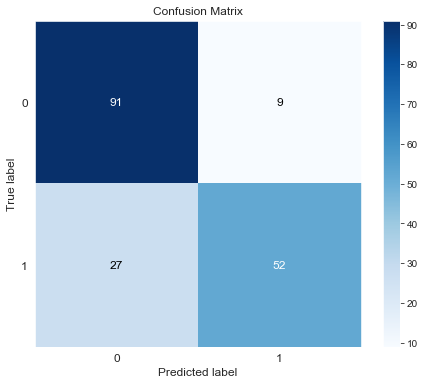

In [39]:
ax=splt.metrics.plot_confusion_matrix(Y_test,y_predicted,figsize=(8,6),text_fontsize="large",title_fontsize="large")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [40]:
print(classification_report(Y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       100
           1       0.85      0.66      0.74        79

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.79       179



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


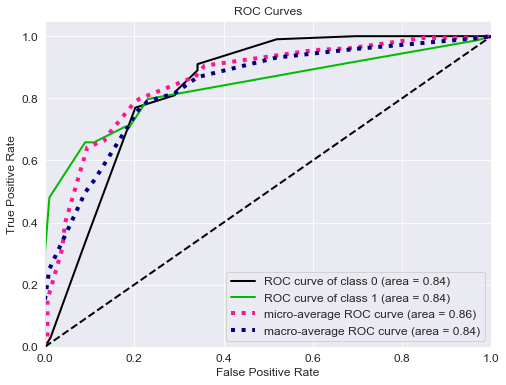

In [41]:
#plotting roc curve
pred_probab=clf.predict_proba(X_test)
splt.metrics.plot_roc_curve(Y_test,pred_probab,figsize=(8,6),text_fontsize="large")
plt.show()

## Final Result

In [45]:
Result=pd.DataFrame({"Actual":Y_test,"Predicted":y_predicted})
Result.head(20)

,Actual,Predicted
707,1,0
37,0,0
615,1,1
169,0,0
68,1,1
606,0,0
630,1,0
785,0,0
660,1,0
728,0,0
